In [ ]:
## log loss or binary cross entrophy -(y*log(y^) + (1-y)log(1-y^))

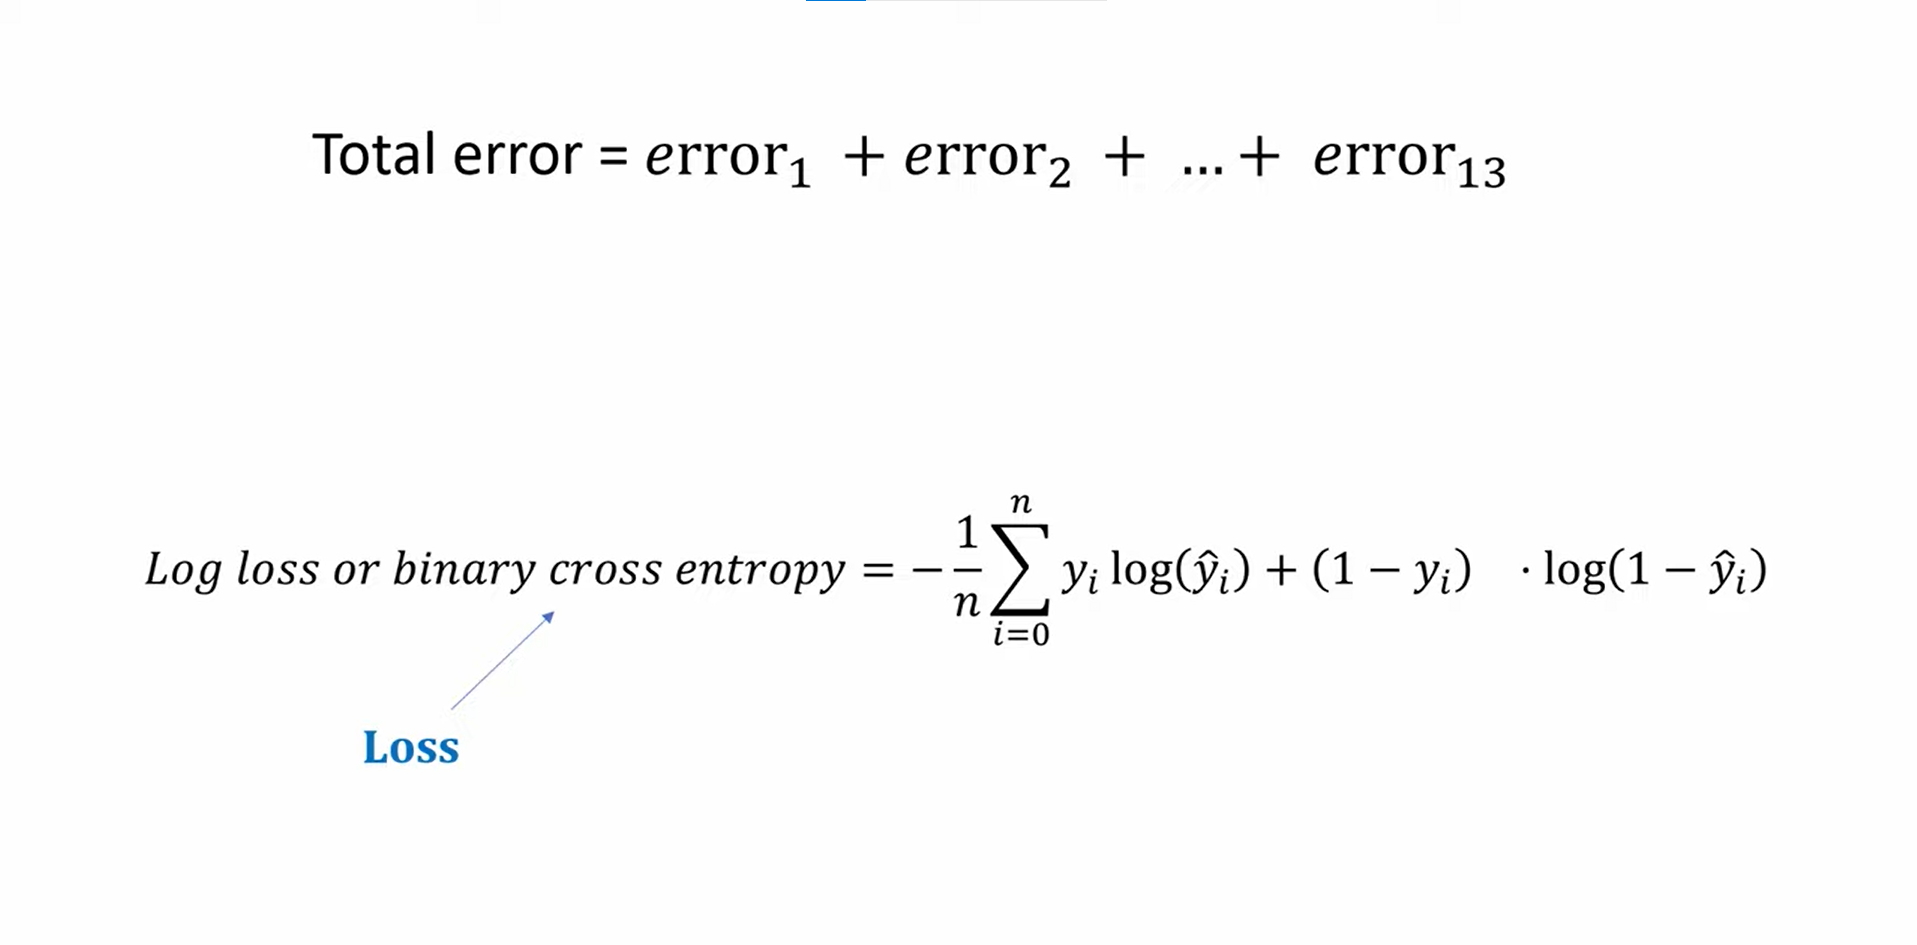

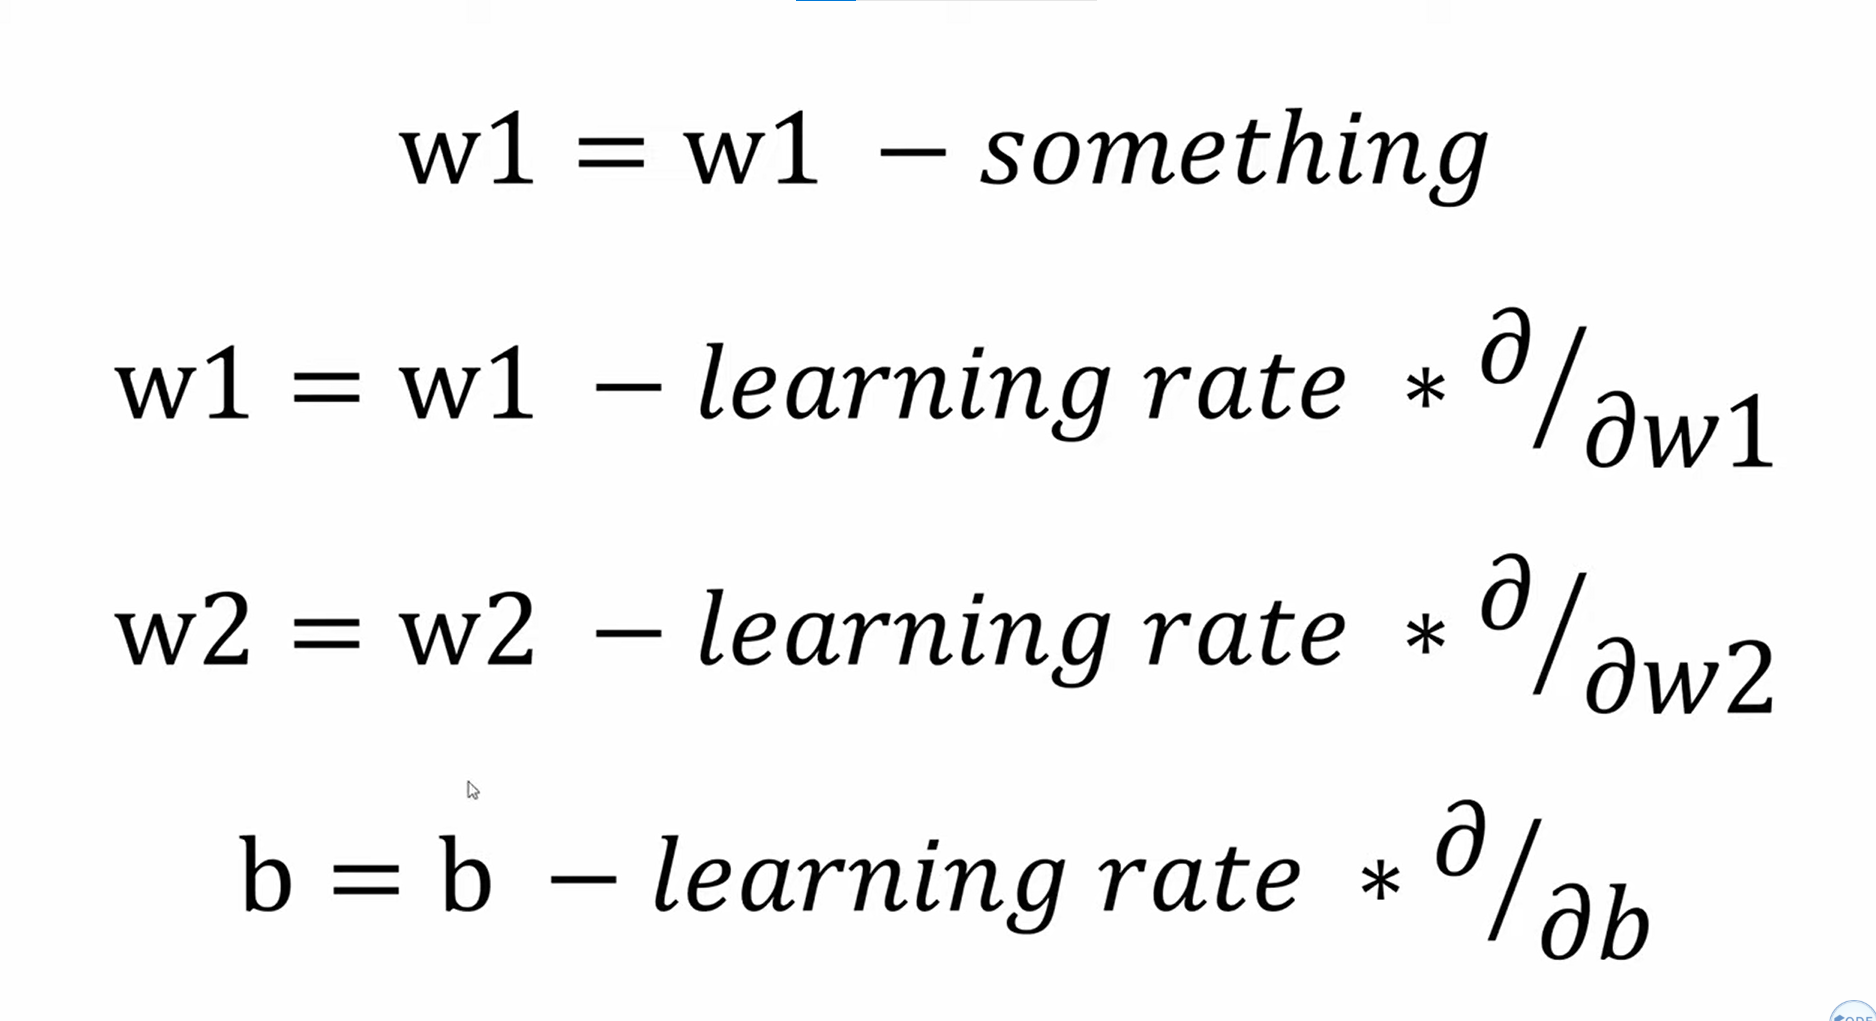

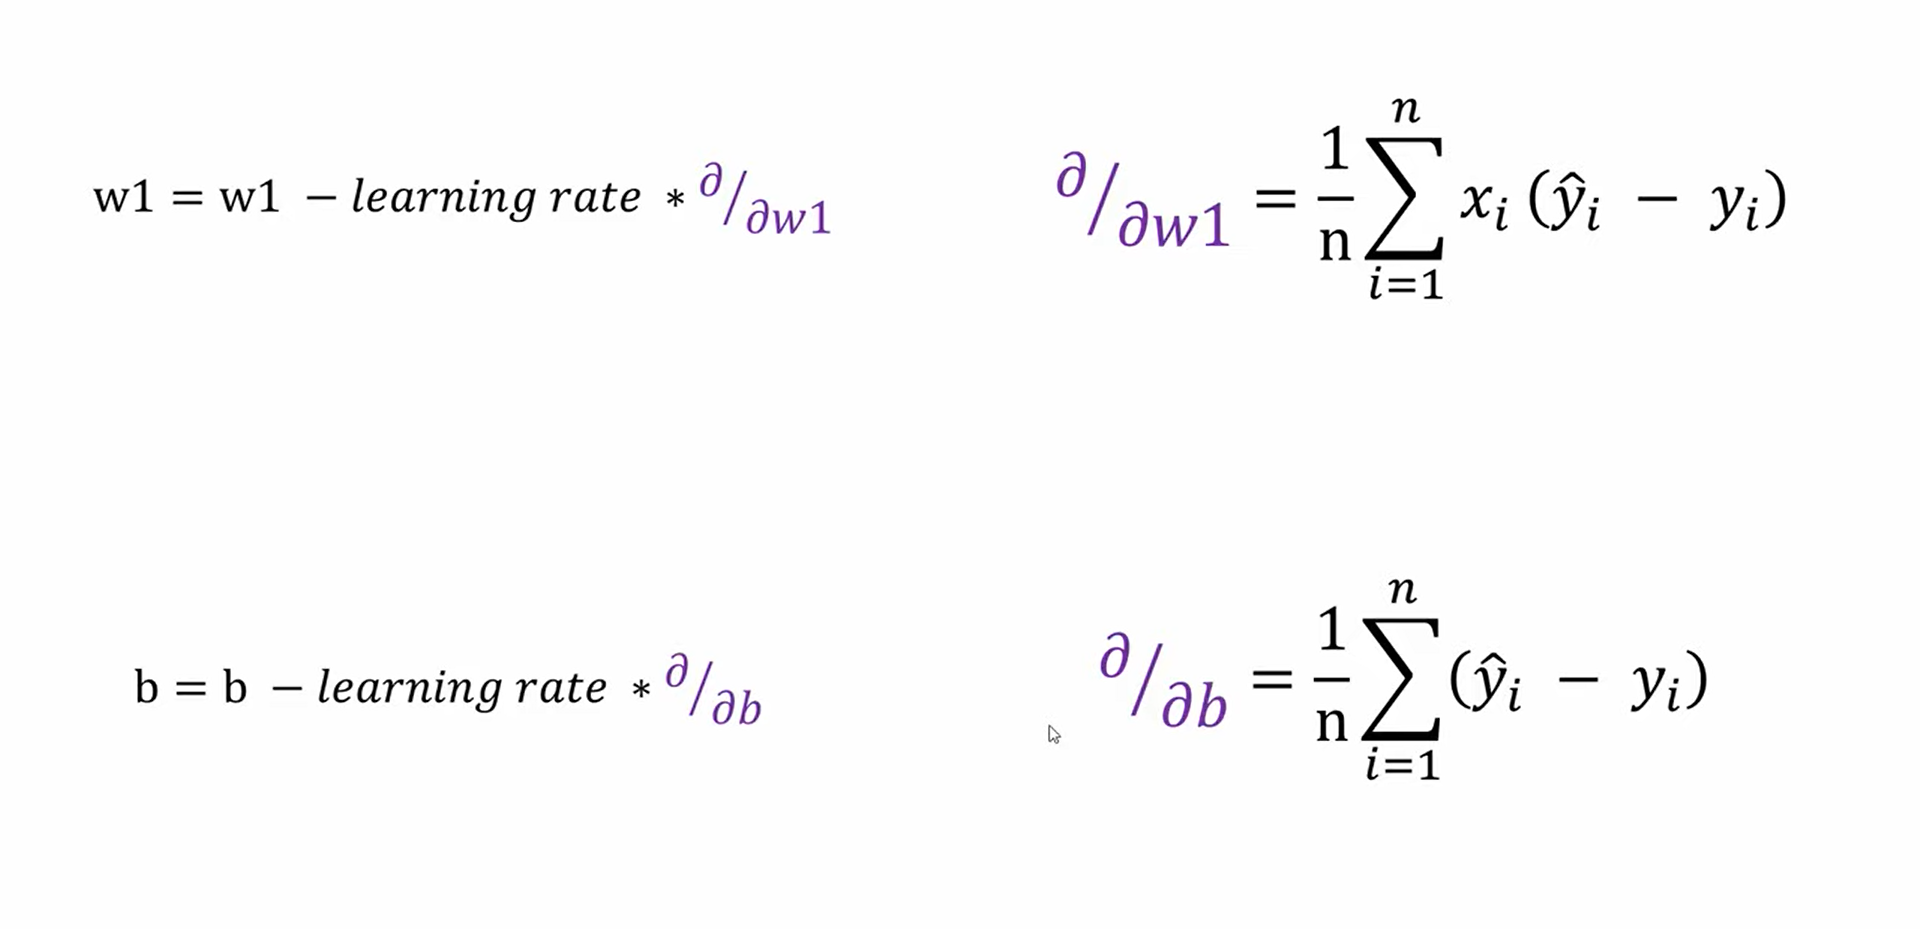

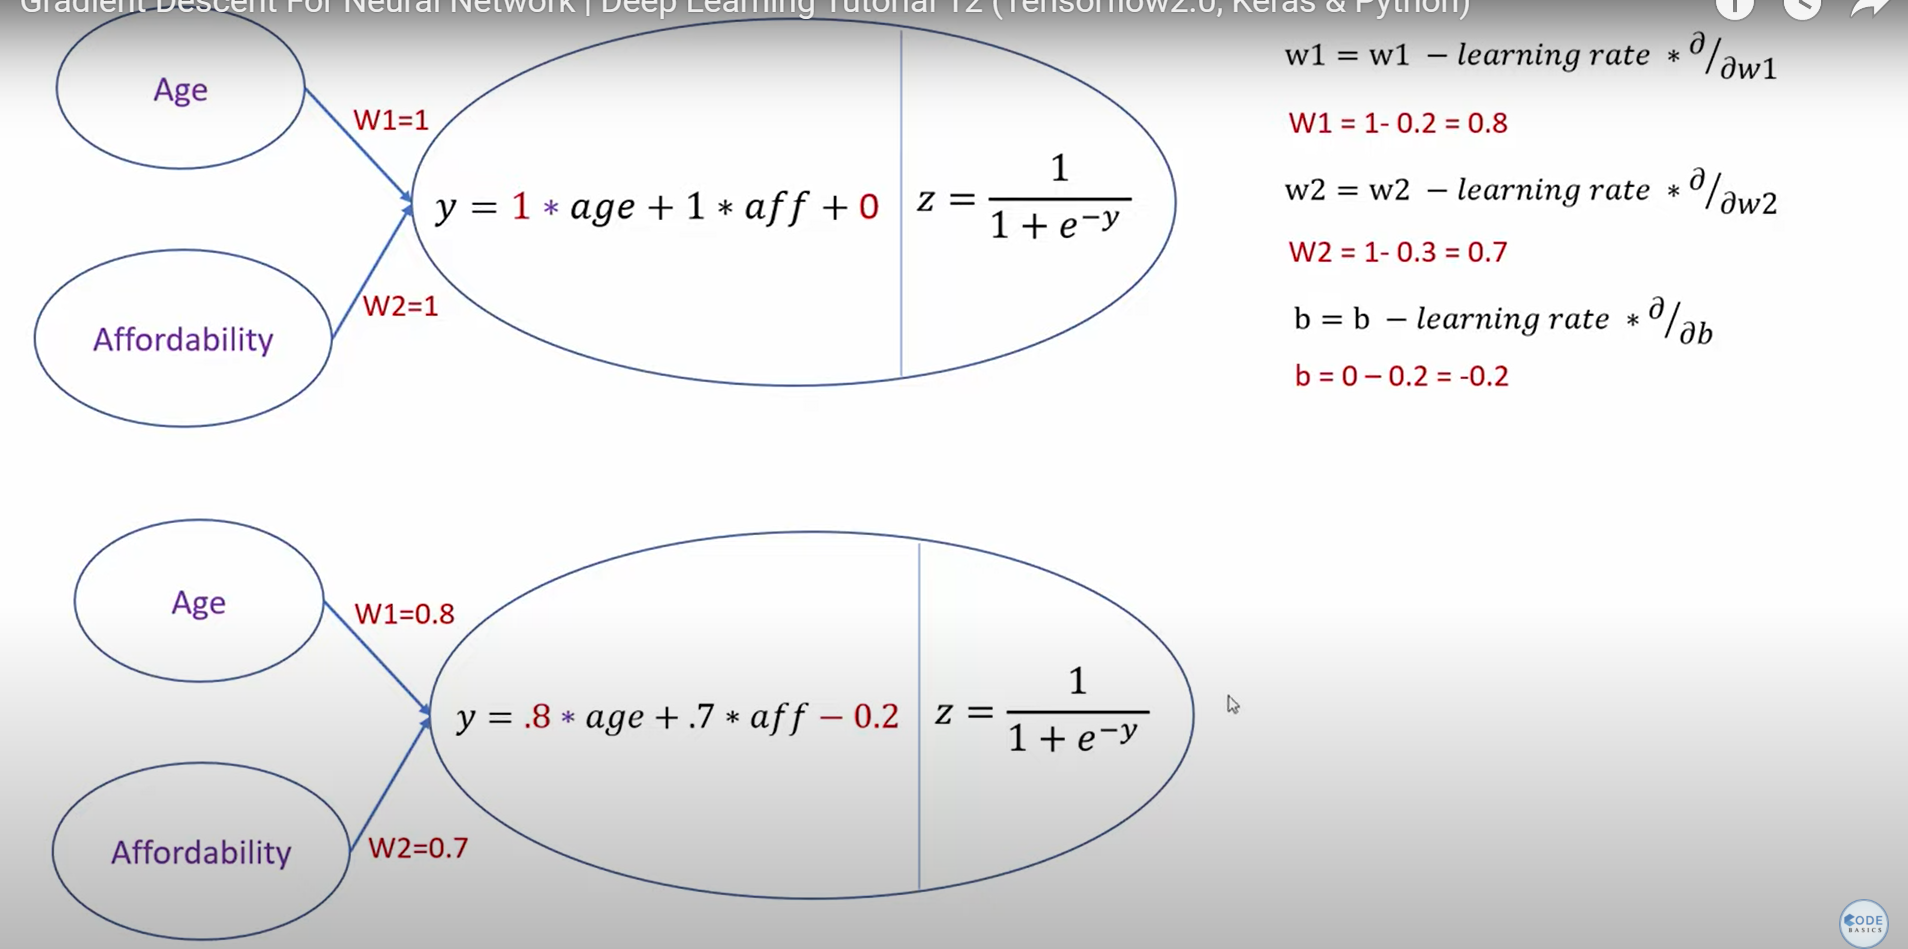

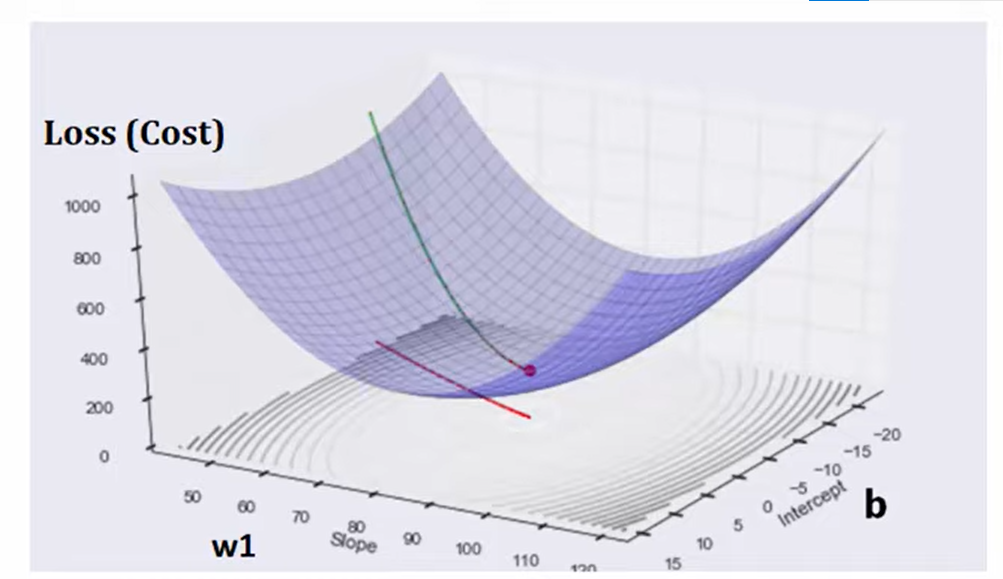

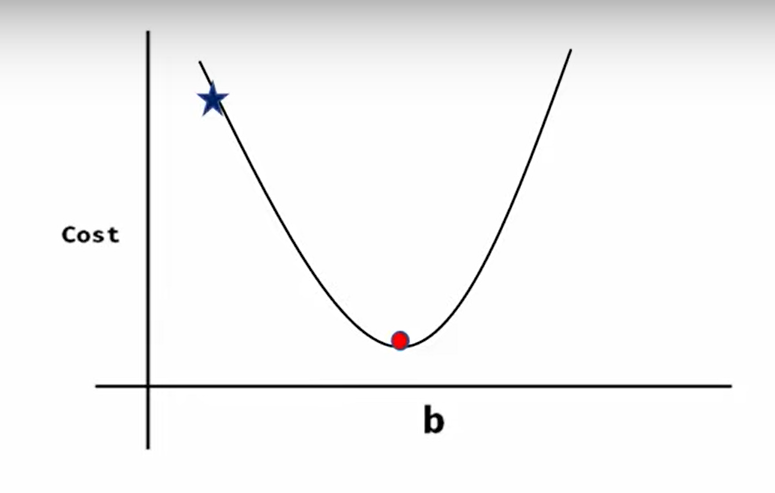 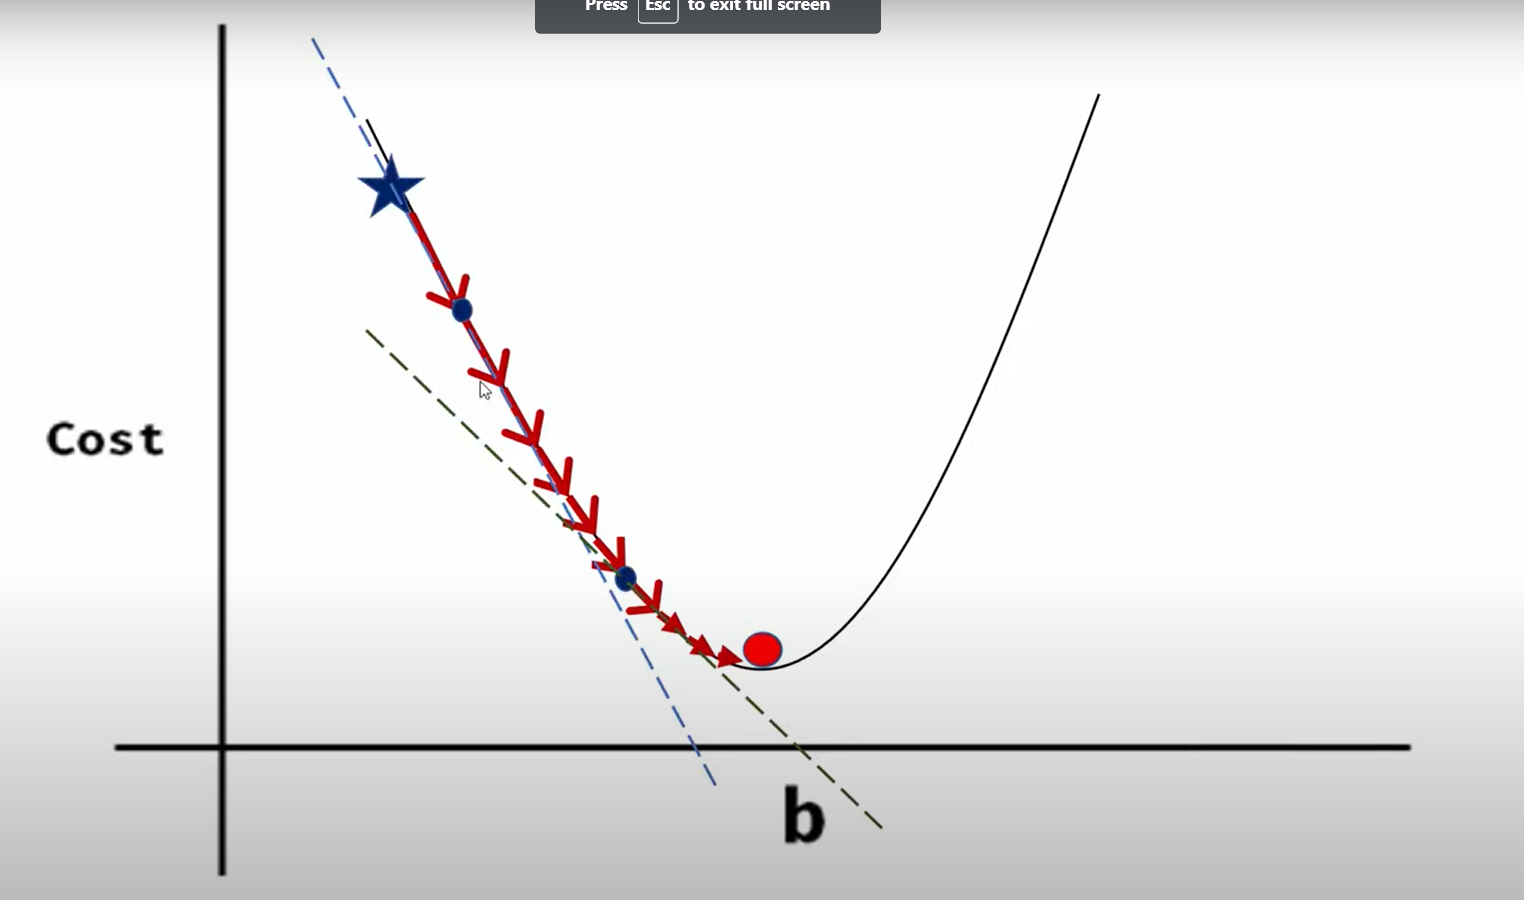

In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/6_gradient_descent/insurance_data.csv")

In [4]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [5]:
import tensorflow as tf 
from tensorflow import keras

In [6]:
import numpy as bp
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [16]:
len(x_train)

22

In [17]:
x_train_scaled = x_train.copy()
x_train_scaled

,age,affordibility
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1
19,18,1
25,54,1
16,25,0
20,21,1
3,52,0


In [18]:
x_train_scaled['age'] = x_train_scaled['age'] / 100 

In [19]:
x_test_scaled = x_test

In [20]:
x_test_scaled['age'] = x_test_scaled['age'] / 100

In [21]:
x_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [22]:
### bilid neural network

In [26]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation = 'sigmoid' , kernel_initializer = 'ones' , bias_initializer = 'zeros')
])

In [32]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [33]:
model.fit(x_train_scaled , y_train , epochs = 50)

Epoch 1/50
1/1 [==============================] - 0s 438ms/step - loss: 0.4621 - accuracy: 0.9091
Epoch 2/50
1/1 [==============================] - 0s 130ms/step - loss: 0.4621 - accuracy: 0.9091
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4621 - accuracy: 0.9091
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4620 - accuracy: 0.9091
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4620 - accuracy: 0.9091
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.4620 - accuracy: 0.9091
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.4620 - accuracy: 0.9091
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4619 - accuracy: 0.9091
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.4619 - accuracy: 0.9091
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4619 - accuracy: 0.9091
Epoch 11/50
1/1 [================

In [34]:
model.evaluate(x_test_scaled , y_test)

1/1 [==============================] - 0s 198ms/step - loss: 0.3502 - accuracy: 1.0000


[0.35024845600128174, 1.0]

In [36]:
x_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [35]:
model.predict(x_test_scaled)

1/1 [==============================] - 0s 118ms/step


array([[0.7073183 ],
       [0.35132447],
       [0.16177939],
       [0.47564623],
       [0.7282063 ],
       [0.83263487]], dtype=float32)

In [38]:
coef , intercept = model.get_weights()
coef , intercept 

(array([[5.157302 ],
        [1.4444094]], dtype=float32),
 array([-2.9859462], dtype=float32))

In [39]:
#### self

In [40]:
import math 
def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [42]:
def prediciton_function( age , affordibility):
    weighted_sum = coef[0] * age + coef[1] * affordibility + intercept 
    return sigmoid(weighted_sum)
    

In [43]:
prediciton_function(0.47,1)

0.7073182840000742

In [44]:
### graient descent 

In [45]:
def log_loss(y_true , y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(epsilon , i  ) for i in y_predicted]
    y_predicted_new = [min(1-epsilon , i  ) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))